In [78]:
import sys 
sys.path.append('..')
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 
import quarantines as Q 
import quarantines_mongo as qm 
import EoNlocal as EoN 
import covid_params as CP

In [2]:
N = 10 ** 4 
m = 5
G = nx.barabasi_albert_graph(N, m)

In [3]:
beta_ = 0.1656
gamma_ = 0.0253



In [4]:
Q.run_until_time(G, beta_, gamma_, 0.005, float('inf'))[-1].get_final_R()

10000

In [6]:
for f, name, kwargs in [(CP.cooper_params, 'cooper', CP.COOPER_KWARGS), (CP.jo_params, 'jo', CP.JO_KWARGS)]:
    for kwarg in kwargs:
        tau, gamma = f(kwarg)
        runs = [Q.run_until_time(G, tau, gamma, 0.0005, float('inf'))[-1].get_final_R() for _ in range(5)]
        print(name, kwarg, runs)
    

cooper china [10000, 10000, 10000, 10000, 10000]
cooper sk [10000, 10000, 10000, 10000, 10000]
cooper india [10000, 9998, 9999, 10000, 10000]
cooper aus [9998, 9999, 9998, 10000, 10000]
cooper usa [10000, 10000, 10000, 10000, 10000]
cooper texas [9996, 9997, 9996, 9997, 9999]
cooper italy [9999, 10000, 10000, 10000, 10000]
jo sk [10000, 10000, 10000, 10000, 10000]
jo seoul [10000, 10000, 9998, 9999, 9999]
jo busan [8768, 8695, 8740, 8686, 8619]
jo daegu [9201, 9184, 9203, 9261, 9149]


In [8]:
tau, gammma = CP.cooper_params('texas')


(0.14, 0.0387)

In [74]:
tup = Q.quarantine_by_prop(G, tau, gamma, 0.0005, [_ / 3.7 for _ in range(100)], float('inf'))

In [75]:
tup.get_final_R()

8536.0

In [86]:
outputs = [] 
for _ in [0.2 + _ / 100 for _ in range(31)]:
    print(_)
    outputs.append(Q.quarantine_by_prop(G, tau, gamma, 0.0005, [_,_ / 2, _ * _ ], float('inf'), num_iter=5))


0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.30000000000000004
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43000000000000005
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5


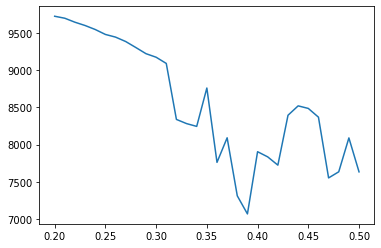

In [87]:
plt.plot([0.2 + _ / 100 for _ in range(31)], [_.get_final_R() for _ in outputs])